## Pressure and Flowrate Time Series Analysis of Air Tightness Compliance Tests over Window Wall Systems (According to ASTM-E783)

In this code, I intend to sketch time-series data to represent flow rate and pressure adjustment for performing airtightness compliance tests over a window wall sample.

For this purpose, the pressure and flow rate time series are created for four different phases:
#### Phase 1) Ramp
In this phase, the pressure is raised to 300 Pa from the initial zero value. the flow rate is accordingly adjust itself to a stable value in harmony with the pressure.

#### Phase 2) Extraneous flow rate and pressure
In this phase, both pressure and airflow remain relatively stable (with natural minor fluctuations) representing extraneous airflow

#### Phase 3) Exterior mask take-off, pressure drop and raise, and flow adjustment
In this phase, the exterior mask over the tested airflow is taken off, therefore pressure is dropped due to sample leakage. The pressure is then re-adjusted to 300 Pa leading to an increase in flow (ramp to total flow)

#### Phase 4) Extraneous flow rate and pressure
In this phase, like Phase 2, both pressure and airflow remain relatively stable (with natural minor fluctuations) representing total airflow

In [2]:
# Import essential modules and define important inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dec = 0.5 # deceleration (for ramp increase or decrease)
ext_flow = 1.8 # extranous flow
total_flow = 2.5 # total flow
noise_scale_flow = 0.05  # For adding fluctuation to flow
noise_scale_pres = 5  # For adding fluctuation to pressure
ref_p = 300 # Reference pressure, AW class, 300 Pa
red_p = 130 # Reduced pressure due to exterior mask take_off


In [3]:
##################################
### Create Airflow Time Series ###
##################################

# Create from beginning to the end of extraneous air flow phase
t_values = np.linspace(0, 10, 60) # make ramp t values
fluctuations = np.random.normal(loc = 0, scale = noise_scale_flow, size = 60) # make fluctuations to add
ramp = (1 - np.exp(dec*-t_values)) * ext_flow # ramp to extraneous flow
ramp = ramp + fluctuations # add natural fluctuation to the first ramp
q_e = np.random.normal(loc = 1.8, scale = noise_scale_flow, size = 90) # make stable extraneous air flow (with natural fluctuation)

# Create from the end of extraneous to the end of total air flow 
ramp2 = (1 - np.exp(dec*-t_values)) * (total_flow - ext_flow) + ext_flow # ramp to total flow
ramp2 = ramp2 + fluctuations # add natural fluctuation to the second ramp
q_t = np.random.normal(loc = 2.5, scale = 0.12, size = 60) # make stable total air flow

# Append all flow time-series
q = np.concatenate((ramp, q_e, ramp2, q_t))
q = pd.Series(q, index = np.arange(len(q)))
q.index = q.index/3


In [4]:
###################################
### Create Pressure Time Series ###
###################################

ramp_p = (1 - np.exp(dec*-t_values)) * ref_p # ramp to reference pressure: 300 Pa
fluctuations_p = np.random.normal(loc = 0, scale = noise_scale_pres, size = 60) # make pressure fluctuation to add
ramp_p = ramp_p + fluctuations_p # add natural fluctuation to the pressure ramp
p_e = np.random.normal(loc = ref_p, scale = 5, size = 90) # extraneous p (300 Pa + natural fluctuations)

# Pressure drop and raise due to mask take-off
t_drop_raise = np.linspace(0, 10, 30) # drop phase t values (30 steps instead of 60)
fluctuations_p_ramp = np.random.normal(loc = 0, scale = 5, size = 30) # fluctuations 
p_drop = red_p + (np.exp(dec*-t_drop_raise)) * (ref_p - red_p) + fluctuations_p_ramp # pressure drop
p_raise = ref_p + (np.exp(dec*-t_drop_raise)) * (red_p - ref_p) + fluctuations_p_ramp # pressure raise again

p_t = np.random.normal(loc = 300, scale = 5, size = 60) # total p (300 Pa + natural fluctuations)

# Append all flow time-series
p = np.concatenate((ramp_p, p_e, p_drop, p_raise, p_t))
p = pd.Series(p, index = np.arange(len(p)))
p.index = p.index/3


C:\Users\MahdaviAl\AppData\Local\Temp\ipykernel_34880\2733869733.py:37: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(lines, labels, loc='lower right', edgecolor='black')


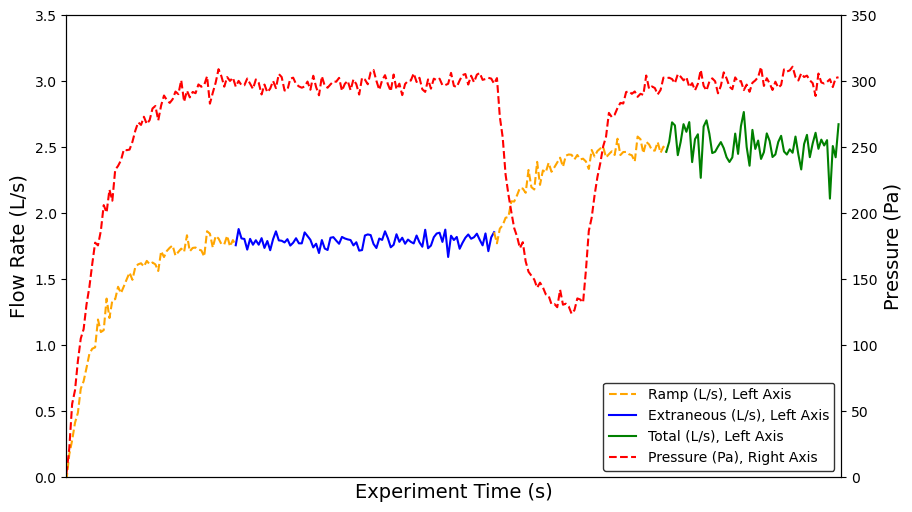

In [5]:
################
### Plotting ###
################

# Create the figure and the primary axis (ax1)
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Plot multiple flow rate data series on the primary axis
# Ramp (0:60), Extraneous (59:150), additional Ramp (149:210), and Total (209:300)
line1, = ax1.plot(q.iloc[0:60].index, q.iloc[0:60].values, linestyle='--', color='orange', label='Ramp (L/s), Left Axis')
line2, = ax1.plot(q.iloc[59:150].index, q.iloc[59:150].values, color='b', label='Extraneous (L/s), Left Axis')
line3, = ax1.plot(q.iloc[149:210].index, q.iloc[149:210].values, linestyle='--', color='orange')
line4, = ax1.plot(q.iloc[209:300].index, q.iloc[209:300].values, color='g', label='Total (L/s), Left Axis')

# Set y-axis properties for flow rate (primary axis)
ax1.set_ylabel('Flow Rate (L/s)', fontsize=14)
ax1.set_ylim(0, 3.5)

# Create a secondary y-axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot pressure data on the secondary axis
line5, = ax2.plot(p.index, p.values, linestyle='--', color='r', label ='Pressure (Pa), Right Axis')

# Set y-axis properties for pressure (secondary axis)
ax2.set_ylabel('Pressure (Pa)', fontsize=14)
ax2.set_ylim(0, 350)

# Set x-axis properties
ax1.set_xlabel('Experiment Time (s)', fontsize=14)
ax1.set_xlim(0, len(q)/3)
ax1.set_xticks([])

# Create a legend with all plotted lines and set its position
lines = [line1, line2, line3, line4, line5]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right', edgecolor='black')

plt.show()
